In [1]:
%%cpp -d

// $Id: $

/*!
 * \file makeRAA_BUP2020.C
 * \brief 
 * \author Jin Huang <jhuang@bnl.gov>
 * \version $Revision:   $
 * \date $Date: $
 */

#include "SaveCanvas.C"
#include "sPhenixStyle.C"

#include <TChain.h>
#include <TCut.h>
#include <TEfficiency.h>
#include <TF1.h>
#include <TGraphAsymmErrors.h>
#include <TGraphErrors.h>
#include <TH2.h>
#include <TH3.h>
#include <TPolyLine.h>

#include <TFile.h>

#include <TColor.h>
#include <TLatex.h>
#include <TLegend.h>
#include <TLine.h>
#include <TStyle.h>

#include <TMath.h>
#include <TPad.h>
#include <TString.h>
#include <TTree.h>
#include <TVectorD.h>
#include <TVirtualFitter.h>

#include <cmath>
#include <iostream>

using namespace std;
// ROOT6 disabled assert. Well....
#ifdef assert
#undef assert
#endif
#define assert(exp)                                                                             \
  {                                                                                             \
    if (!(exp))                                                                                 \
    {                                                                                           \
      cout << "Assert (" << #exp << ") failed at " << __FILE__ << " line " << __LINE__ << endl; \
      exit(1);                                                                                  \
    }                                                                                           \
  }

In [2]:

SetsPhenixStyle();
gStyle->SetOptStat(0);
gStyle->SetOptFit(1111);
TVirtualFitter::SetDefaultFitter("Minuit2");

sPhenixStyle: Applying nominal settings.
sPhenixStyle: ROOT6 mode


# Constants and inputs

In [3]:

const double refAuAuMB = 240e9;
const double refAuAuXSec = 6.8252;  // b
TString refD0_significance_TFile = "D0_significance.root";
const double Psi2_resolution = 0.5;

const double AuAu_Ncoll_C0_10 = 960.2;  // [DOI:?10.1103/PhysRevC.87.034911?]
const double AuAu_Ncoll_C0_20 = 770.6;  // [DOI:?10.1103/PhysRevC.91.064904?]
const double AuAu_Ncoll_60_70 = 29.8;   //PHYSICAL REVIEW C 87, 034911 (2013)
const double AuAu_Ncoll_70_80 = 12.6;   //PHYSICAL REVIEW C 87, 034911 (2013)
const double AuAu_Ncoll_C0_100 = 238.5;   // BUP2020
const double pAu_Ncoll_C0_100 = 4.7;    // pb^-1 [sPH-TRG-000]

const double AuAu_rec_3year = (5.7 + 15) * 1e9;       // BUP2020
const double AuAu_rec_5year = AuAu_rec_3year + 30e9;  // BUP2020

const double pp_inelastic_crosssec = 42e-3;        // 42 mb [sPH-TRG-000]
const double pp_rec_3year = 6.2e12;                // BUP2020
const double pp_rec_5year = pp_rec_3year + 80e12;  // BUP2020
const double pp_beam_pol = 0.57;

const double OO_rec_5year = 37e9;  // BUP2020
const double OO_Ncoll_C0_100 = 9.6;   // BUP2020
const double OO_inelastic_crosssec = 1.12214;   // BUP2020

const double ArAr_rec_5year = 12e9;  // BUP2020
const double ArAr_Ncoll_C0_100 = 28.5;   // BUP2020
const double ArAr_inelastic_crosssec = 2.3423;   // BUP2020


# ROOT data Inputs

Based on sPH-HF-2017-002

In [4]:

  TFile *fin1 = new TFile(refD0_significance_TFile);
  assert(fin1);

  TGraph *gProD0_0_10_noPid = (TGraph *) fin1->Get("gProD0_0_10_noPid");
  assert(gProD0_0_10_noPid);
  TGraph *gNonProD0_0_10_noPid = (TGraph *) fin1->Get("gNonProD0_0_10_noPid");
  assert(gNonProD0_0_10_noPid);

  TGraph *gProD0_10_40_noPid = (TGraph *) fin1->Get("gProD0_10_40_noPid");
  assert(gProD0_10_40_noPid);
  TGraph *gNonProD0_10_40_noPid = (TGraph *) fin1->Get("gNonProD0_10_40_noPid");
  assert(gNonProD0_10_40_noPid);

  TGraph *gProD0_60_80_noPid = (TGraph *) fin1->Get("gProD0_60_80_noPid");
  assert(gProD0_60_80_noPid);
  TGraph *gNonProD0_60_80_noPid = (TGraph *) fin1->Get("gNonProD0_60_80_noPid");
  assert(gNonProD0_60_80_noPid);

  TGraph *gProD0_0_80_noPid = (TGraph *) fin1->Get("gProD0_0_80_noPid");
  assert(gProD0_0_80_noPid);
  TGraph *gNonProD0_0_80_noPid = (TGraph *) fin1->Get("gNonProD0_0_80_noPid");
  assert(gNonProD0_0_80_noPid);

  TFile *_file0 = new TFile("RAA_DB_theory.root");
  assert(_file0);

  TGraph *RAA_pi = (TGraph *) _file0->GetObjectChecked("RAA_pi", "TGraph");
  assert(RAA_pi);
  TGraph *RAA_D = (TGraph *) _file0->GetObjectChecked("RAA_D", "TGraph");
  assert(RAA_D);
  TGraph *RAA_B = (TGraph *) _file0->GetObjectChecked("RAA_B", "TGraph");
  assert(RAA_B);
  TGraph *RAA_D0_B = (TGraph *) _file0->GetObjectChecked("RAA_D0_B", "TGraph");
  assert(RAA_D0_B);
  TGraphErrors *RAA_proj_D = (TGraphErrors *) _file0->GetObjectChecked("RAA_proj_D", "TGraph");
  assert(RAA_proj_D);
  TGraphErrors *RAA_proj_D_B = (TGraphErrors *) _file0->GetObjectChecked("RAA_proj_D_B", "TGraph");
  assert(RAA_proj_D_B);

# Significance calculations

## Utilities

In [5]:
%%cpp -d

TGraph *GetSignificance(const TGraph *refAuAuSignificance, const double AuAu_centrality_ncoll, const double N_Collision, const double centrality_ncoll)
{
  TGraph *ret = new TGraph(*refAuAuSignificance);

  double max(0);
  for (int i = 0; i < ret->GetN(); ++i)
  {
    ret->GetY()[i] *= sqrt(N_Collision * centrality_ncoll / refAuAuMB / AuAu_centrality_ncoll);

    max = std::max(max, ret->GetY()[i]);
  }

  ret->SetMaximum(max * 1.2);
  ret->SetTitle(Form("Significance for N_Collision = %.4e centrality_ncoll = %.4e, based on %s",
                     N_Collision, centrality_ncoll, refAuAuSignificance->GetTitle()));
  return ret;
}

## 3 year pp runs

In [6]:
 const  TGraph *gProD0_Significance_pp_3year = GetSignificance(
      gProD0_60_80_noPid,                           //        const TVectorD &refAuAuSignificance,
      0.1 * (AuAu_Ncoll_60_70 + AuAu_Ncoll_70_80),  //        const double AuAu_centrality_ncoll,
      pp_inelastic_crosssec * pp_rec_3year,         //        const double N_Collision,
      1                                             //        const double centrality_ncoll
  );
  const TGraph *gNonProD0_Significance_pp_3year = GetSignificance(
      gNonProD0_60_80_noPid,                        //        const TVectorD &refAuAuSignificance,
      0.1 * (AuAu_Ncoll_60_70 + AuAu_Ncoll_70_80),  //        const double AuAu_centrality_ncoll,
      pp_inelastic_crosssec * pp_rec_3year,         //        const double N_Collision,
      1                                             //        const double centrality_ncoll
  );

Info in <TCanvas::Print>: png file fig_BUP2020/D0_BUP2020pp_significance_3yr.png has been created


Save TH1 hframe
Save TGraph Graph
Save TH1 hframe


Info in <TCanvas::SaveAs>: ROOT file fig_BUP2020/D0_BUP2020pp_significance_3yr.root has been created


Save TGraph Graph


Info in <TCanvas::Print>: eps file fig_BUP2020/D0_BUP2020pp_significance_3yr.eps has been created
Info in <TCanvas::Print>: SVG file fig_BUP2020/D0_BUP2020pp_significance_3yr.svg has been created


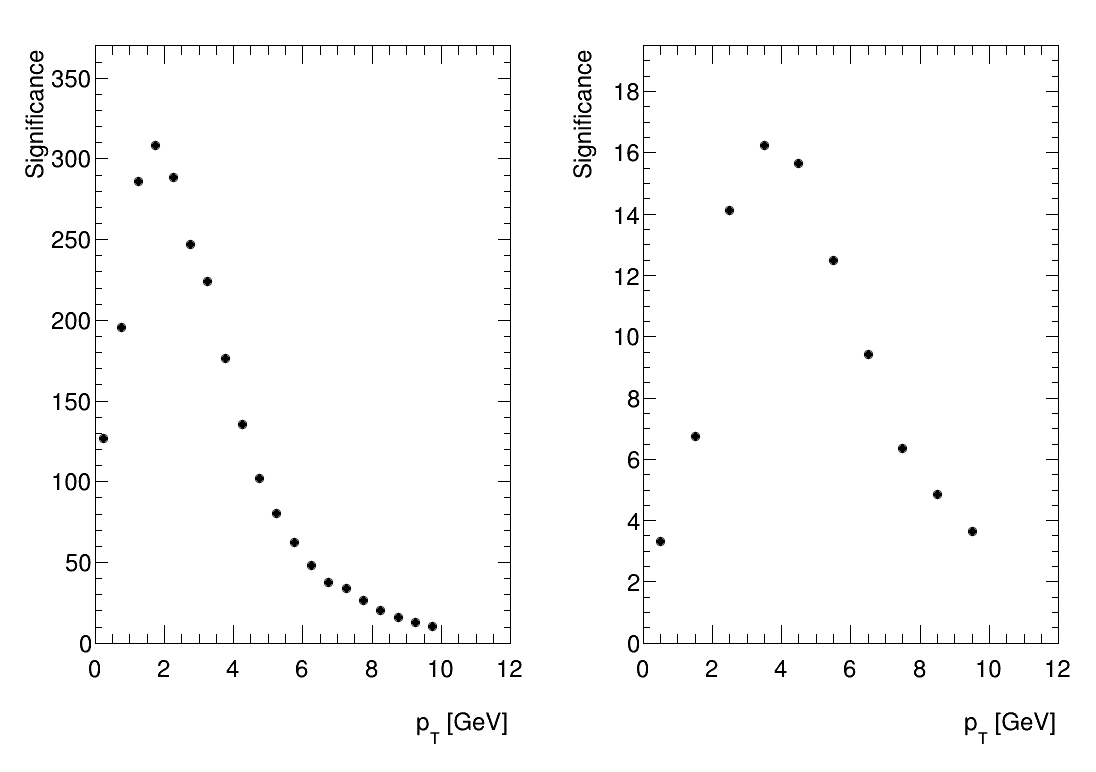

removed ‘fig_BUP2020/D0_BUP2020pp_significance_3yr.svg’


Info in <TCanvas::SaveSource>: C++ Macro file: fig_BUP2020/D0_BUP2020pp_significance_3yr.C has been generated


In [7]:
{
    TString s_suffix = "_3yr";

    TCanvas *c1 = new TCanvas("D0_BUP2020pp_significance" + s_suffix,
                              "D0_BUP2020pp_significance" + s_suffix, 1100, 800);
    c1->Divide(2, 1);
    int idx = 1;
    TPad *p;

    p = (TPad *) c1->cd(idx++);
    c1->Update();
    p->DrawFrame(0, 0, 12, gProD0_Significance_pp_3year->GetMaximum())->SetTitle(";p_{T} [GeV];Significance");
    gProD0_Significance_pp_3year->DrawClone("p");

    p = (TPad *) c1->cd(idx++);
    c1->Update();
    p->DrawFrame(0, 0, 12, gNonProD0_Significance_pp_3year->GetMaximum())->SetTitle(";p_{T} [GeV];Significance");
    gNonProD0_Significance_pp_3year->DrawClone("p");

    c1->Draw();
    SaveCanvas(c1, "fig_BUP2020/" + TString(c1->GetName()), kTRUE);
}

## 5 year pp runs

In [8]:
 const  TGraph *gProD0_Significance_pp_5year = GetSignificance(
      gProD0_60_80_noPid,                           //        const TVectorD &refAuAuSignificance,
      0.1 * (AuAu_Ncoll_60_70 + AuAu_Ncoll_70_80),  //        const double AuAu_centrality_ncoll,
      pp_inelastic_crosssec * pp_rec_5year,         //        const double N_Collision,
      1                                             //        const double centrality_ncoll
  );
  const TGraph *gNonProD0_Significance_pp_5year = GetSignificance(
      gNonProD0_60_80_noPid,                        //        const TVectorD &refAuAuSignificance,
      0.1 * (AuAu_Ncoll_60_70 + AuAu_Ncoll_70_80),  //        const double AuAu_centrality_ncoll,
      pp_inelastic_crosssec * pp_rec_5year,         //        const double N_Collision,
      1                                             //        const double centrality_ncoll
  );

Info in <TCanvas::Print>: png file fig_BUP2020/D0_BUP2020pp_significance_5yr.png has been created


Save TH1 hframe
Save TGraph Graph
Save TH1 hframe
Save TGraph Graph


Info in <TCanvas::SaveAs>: ROOT file fig_BUP2020/D0_BUP2020pp_significance_5yr.root has been created
Info in <TCanvas::Print>: eps file fig_BUP2020/D0_BUP2020pp_significance_5yr.eps has been created
Info in <TCanvas::Print>: SVG file fig_BUP2020/D0_BUP2020pp_significance_5yr.svg has been created


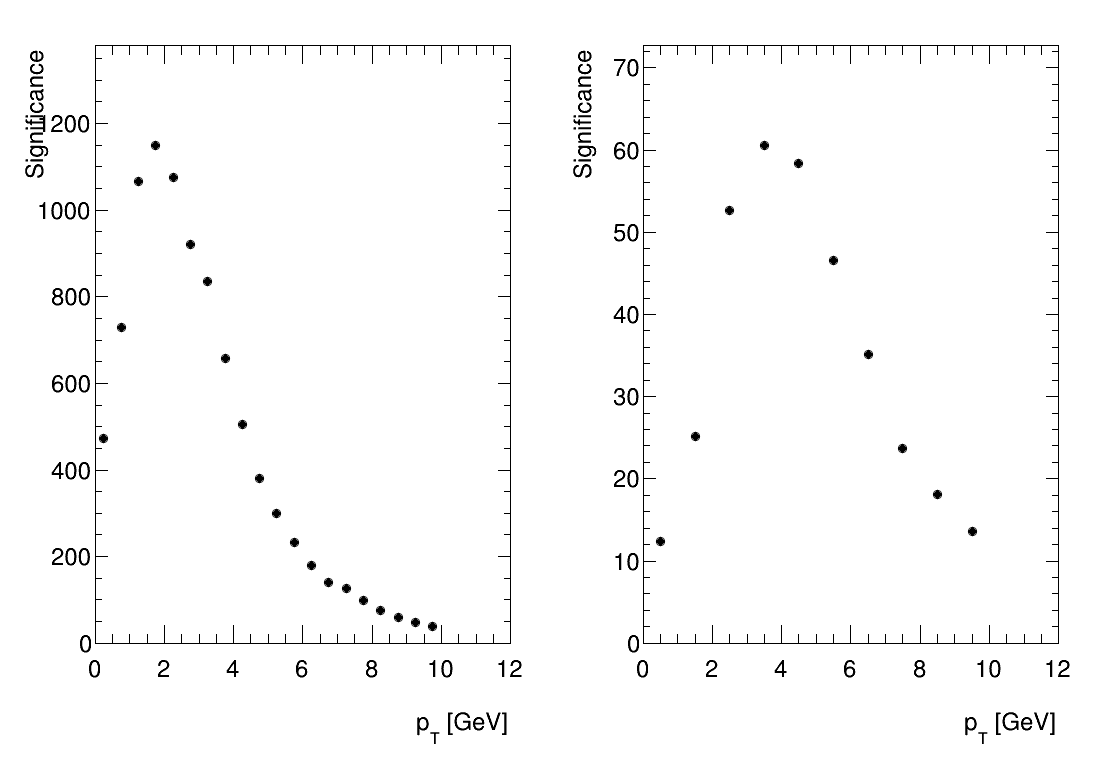

removed ‘fig_BUP2020/D0_BUP2020pp_significance_5yr.svg’


Info in <TCanvas::SaveSource>: C++ Macro file: fig_BUP2020/D0_BUP2020pp_significance_5yr.C has been generated


In [9]:
{
    TString s_suffix = "_5yr";

    TCanvas *c1 = new TCanvas("D0_BUP2020pp_significance" + s_suffix,
                              "D0_BUP2020pp_significance" + s_suffix, 1100, 800);
    c1->Divide(2, 1);
    int idx = 1;
    TPad *p;

    p = (TPad *) c1->cd(idx++);
    c1->Update();
    p->DrawFrame(0, 0, 12, gProD0_Significance_pp_5year->GetMaximum())->SetTitle(";p_{T} [GeV];Significance");
    gProD0_Significance_pp_5year->DrawClone("p");

    p = (TPad *) c1->cd(idx++);
    c1->Update();
    p->DrawFrame(0, 0, 12, gNonProD0_Significance_pp_5year->GetMaximum())->SetTitle(";p_{T} [GeV];Significance");
    gNonProD0_Significance_pp_5year->DrawClone("p");

    c1->Draw();
    SaveCanvas(c1, "fig_BUP2020/" + TString(c1->GetName()), kTRUE);
}

## 5 year AuAu runs, 0-80%

In [10]:
const TGraph *gProD0_Significance_AuAu_0_80_5year = GetSignificance(
  gProD0_0_80_noPid,             //        const TVectorD &refAuAuSignificance,
  0.8 * AuAu_Ncoll_C0_100,       //        const double AuAu_centrality_ncoll,
  AuAu_rec_5year * refAuAuXSec,  //        const double N_Collision,
  0.8 * AuAu_Ncoll_C0_100        //        const double centrality_ncoll
);
const TGraph *gNonProD0_Significance_AuAu_0_80_5year = GetSignificance(
  gNonProD0_0_80_noPid,          //        const TVectorD &refAuAuSignificance,
  0.8 * AuAu_Ncoll_C0_100,       //        const double AuAu_centrality_ncoll,
  AuAu_rec_5year * refAuAuXSec,  //        const double N_Collision,
  0.8 * AuAu_Ncoll_C0_100        //        const double centrality_ncoll
);

Info in <TCanvas::Print>: png file fig_BUP2020/D0_BUP2020AuAu_0_80_significance_5yr.png has been created


Save TH1 hframe
Save TGraph Graph
Save TH1 hframe
Save TGraph Graph
removed ‘fig_BUP2020/D0_BUP2020AuAu_0_80_significance_5yr.svg’


Info in <TCanvas::SaveAs>: ROOT file fig_BUP2020/D0_BUP2020AuAu_0_80_significance_5yr.root has been created
Info in <TCanvas::Print>: eps file fig_BUP2020/D0_BUP2020AuAu_0_80_significance_5yr.eps has been created
Info in <TCanvas::Print>: SVG file fig_BUP2020/D0_BUP2020AuAu_0_80_significance_5yr.svg has been created


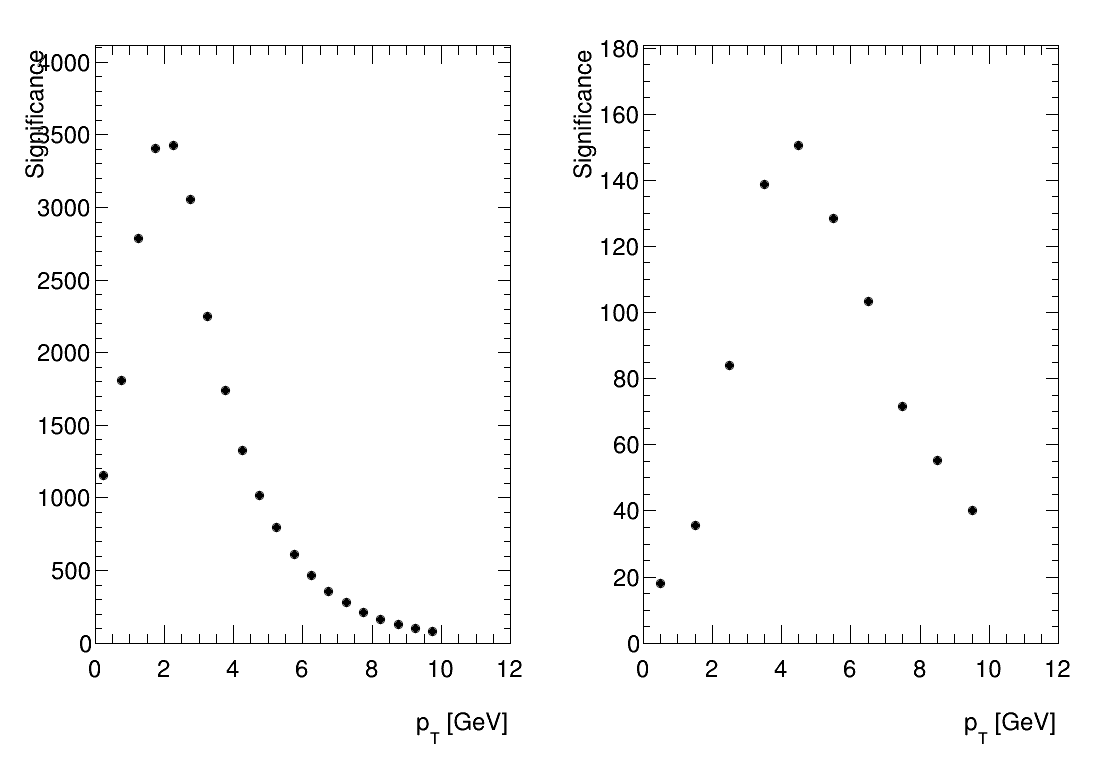

Info in <TCanvas::SaveSource>: C++ Macro file: fig_BUP2020/D0_BUP2020AuAu_0_80_significance_5yr.C has been generated


In [11]:
{
    TString s_suffix = "_5yr";


    TCanvas *c1 = new TCanvas("D0_BUP2020AuAu_0_80_significance" + s_suffix,
                  "D0_BUP2020AuAu_0_80_significance" + s_suffix, 1100, 800);
    c1->Divide(2, 1);
    int idx = 1;
    TPad *p;

    p = (TPad *) c1->cd(idx++);
    c1->Update();
    p->DrawFrame(0, 0, 12, gProD0_Significance_AuAu_0_80_5year->GetMaximum())->SetTitle(";p_{T} [GeV];Significance");
    gProD0_Significance_AuAu_0_80_5year->DrawClone("p");

    p = (TPad *) c1->cd(idx++);
    c1->Update();
    p->DrawFrame(0, 0, 12, gNonProD0_Significance_AuAu_0_80_5year->GetMaximum())->SetTitle(";p_{T} [GeV];Significance");
    gNonProD0_Significance_AuAu_0_80_5year->DrawClone("p");

    c1->Draw();
    SaveCanvas(c1, "fig_BUP2020/" + TString(c1->GetName()), kTRUE);
}

## 5 year OO runs

In [12]:
const TGraph *gProD0_Significance_OO_5year = GetSignificance(
    gProD0_60_80_noPid,                           //        const TVectorD &refAuAuSignificance,
    0.1 * (AuAu_Ncoll_60_70 + AuAu_Ncoll_70_80),  //        const double AuAu_centrality_ncoll,
    OO_rec_5year * OO_inelastic_crosssec,  //        const double N_Collision,
    OO_Ncoll_C0_100        //        const double centrality_ncoll
);

const TGraph *gNonProD0_Significance_OO_5year = GetSignificance(
    gNonProD0_60_80_noPid,                           //        const TVectorD &refAuAuSignificance,
    0.1 * (AuAu_Ncoll_60_70 + AuAu_Ncoll_70_80),  //        const double AuAu_centrality_ncoll,
    OO_rec_5year * OO_inelastic_crosssec,  //        const double N_Collision,
    OO_Ncoll_C0_100        //        const double centrality_ncoll
);

Info in <TCanvas::Print>: png file fig_BUP2020/D0_BUP2020OO_significance_5yr.png has been created


Save TH1 hframe
Save TGraph Graph
Save TH1 hframe
Save TGraph Graph
removed ‘fig_BUP2020/D0_BUP2020OO_significance_5yr.svg’


Info in <TCanvas::SaveAs>: ROOT file fig_BUP2020/D0_BUP2020OO_significance_5yr.root has been created
Info in <TCanvas::Print>: eps file fig_BUP2020/D0_BUP2020OO_significance_5yr.eps has been created
Info in <TCanvas::Print>: SVG file fig_BUP2020/D0_BUP2020OO_significance_5yr.svg has been created


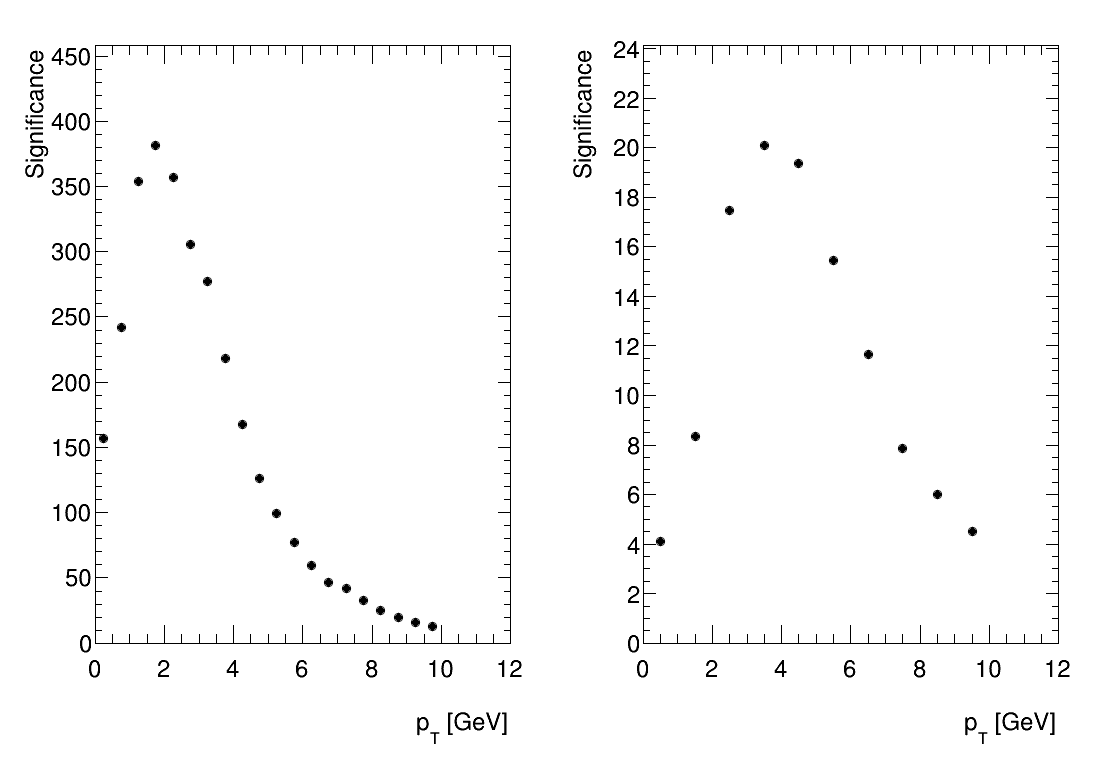

Info in <TCanvas::SaveSource>: C++ Macro file: fig_BUP2020/D0_BUP2020OO_significance_5yr.C has been generated


In [13]:
{
    TString s_suffix = "_5yr";


    TCanvas *c1 = new TCanvas("D0_BUP2020OO_significance" + s_suffix,
                  "D0_BUP2020OO_significance" + s_suffix, 1100, 800);
    c1->Divide(2, 1);
    int idx = 1;
    TPad *p;

    p = (TPad *) c1->cd(idx++);
    c1->Update();
    p->DrawFrame(0, 0, 12, gProD0_Significance_OO_5year->GetMaximum())->SetTitle(";p_{T} [GeV];Significance");
    gProD0_Significance_OO_5year->DrawClone("p");

    p = (TPad *) c1->cd(idx++);
    c1->Update();
    p->DrawFrame(0, 0, 12, gNonProD0_Significance_OO_5year->GetMaximum())->SetTitle(";p_{T} [GeV];Significance");
    gNonProD0_Significance_OO_5year->DrawClone("p");

    c1->Draw();
    SaveCanvas(c1, "fig_BUP2020/" + TString(c1->GetName()), kTRUE);
}

In [14]:
OO_rec_5year*OO_inelastic_crosssec/1e9

(double) 41.519180


In [15]:
OO_rec_5year*OO_inelastic_crosssec/1e9*OO_Ncoll_C0_100

(double) 398.58413


In [16]:
AuAu_rec_5year*refAuAuXSec*.1*(AuAu_Ncoll_60_70+AuAu_Ncoll_70_80)/1e9

(double) 1467.1996


In [17]:
pow(2,2)

(double) 4.0000000


## 5 year ArAr runs

In [18]:
const TGraph *gProD0_Significance_ArAr_5year = GetSignificance(
    gProD0_60_80_noPid,                           //        const TVectorD &refAuAuSignificance,
    0.1 * (AuAu_Ncoll_60_70 + AuAu_Ncoll_70_80),  //        const double AuAu_centrality_ncoll,
    ArAr_rec_5year * ArAr_inelastic_crosssec,  //        const double N_Collision,
    ArAr_Ncoll_C0_100        //        const double centrality_ncoll
);

const TGraph *gNonProD0_Significance_ArAr_5year = GetSignificance(
    gNonProD0_60_80_noPid,                           //        const TVectorD &refAuAuSignificance,
    0.1 * (AuAu_Ncoll_60_70 + AuAu_Ncoll_70_80),  //        const double AuAu_centrality_ncoll,
    ArAr_rec_5year * ArAr_inelastic_crosssec,  //        const double N_Collision,
    ArAr_Ncoll_C0_100        //        const double centrality_ncoll
);

Info in <TCanvas::Print>: png file fig_BUP2020/D0_BUP2020ArAr_significance_5yr.png has been created


Save TH1 hframe
Save TGraph Graph
Save TH1 hframe


Info in <TCanvas::SaveAs>: ROOT file fig_BUP2020/D0_BUP2020ArAr_significance_5yr.root has been created


Save TGraph Graph


Info in <TCanvas::Print>: eps file fig_BUP2020/D0_BUP2020ArAr_significance_5yr.eps has been created
Info in <TCanvas::Print>: SVG file fig_BUP2020/D0_BUP2020ArAr_significance_5yr.svg has been created


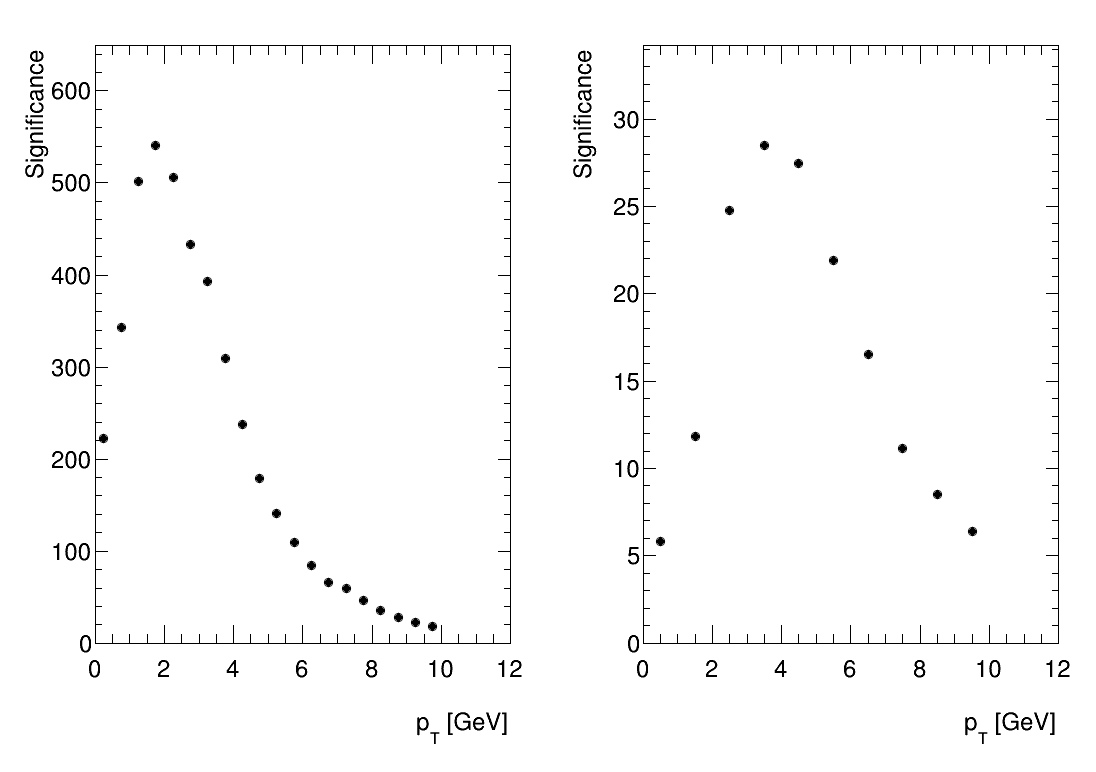

removed ‘fig_BUP2020/D0_BUP2020ArAr_significance_5yr.svg’


Info in <TCanvas::SaveSource>: C++ Macro file: fig_BUP2020/D0_BUP2020ArAr_significance_5yr.C has been generated


In [19]:
{
    TString s_suffix = "_5yr";


    TCanvas *c1 = new TCanvas("D0_BUP2020ArAr_significance" + s_suffix,
                  "D0_BUP2020ArAr_significance" + s_suffix, 1100, 800);
    c1->Divide(2, 1);
    int idx = 1;
    TPad *p;

    p = (TPad *) c1->cd(idx++);
    c1->Update();
    p->DrawFrame(0, 0, 12, gProD0_Significance_ArAr_5year->GetMaximum())->SetTitle(";p_{T} [GeV];Significance");
    gProD0_Significance_ArAr_5year->DrawClone("p");

    p = (TPad *) c1->cd(idx++);
    c1->Update();
    p->DrawFrame(0, 0, 12, gNonProD0_Significance_ArAr_5year->GetMaximum())->SetTitle(";p_{T} [GeV];Significance");
    gNonProD0_Significance_ArAr_5year->DrawClone("p");

    c1->Draw();
    SaveCanvas(c1, "fig_BUP2020/" + TString(c1->GetName()), kTRUE);
}

# RAA projection

## Utilities

In [20]:
%%cpp -d

TGraphErrors *Significance2RAA(const TGraph *AASignificance, const TGraph *refSignificance, const TGraph *RAACentroid)
{
    assert(AASignificance);
    assert(refSignificance);
    assert(RAACentroid);
    
    assert(AASignificance->GetN() == refSignificance->GetN());
    
    const int npoint = AASignificance->GetN() ;
    
    TVectorD x(npoint, AASignificance->GetX());
    TVectorD y(npoint);
    TVectorD ex(npoint);
    TVectorD ey(npoint);
    
    for (int i = 0; i<npoint; ++i)
    {
        y[i] = RAACentroid->Eval(x[i]);   
        ey[i] = y[i] * sqrt(1/pow( AASignificance->GetY()[i], 2) + 1/pow( refSignificance->GetY()[i], 2));        
    }    
    
    TGraphErrors * gr = new TGraphErrors(x, y, ex, ey);
    
    return gr;
}

TGraphErrors *Significance2RAA(const TGraph *AASignificance, const TGraph *refSignificance, const double RAACentroid)
{
    assert(AASignificance);
    assert(refSignificance);
    
    assert(AASignificance->GetN() == refSignificance->GetN());
    
    const int npoint = AASignificance->GetN() ;
    
    TVectorD x(npoint, AASignificance->GetX());
    TVectorD y(npoint);
    TVectorD ex(npoint);
    TVectorD ey(npoint);
    
    for (int i = 0; i<npoint; ++i)
    {
        y[i] = RAACentroid;   
        ey[i] = y[i] * sqrt(1/pow( AASignificance->GetY()[i], 2) + 1/pow( refSignificance->GetY()[i], 2));        
    }    
    
    TGraphErrors * gr = new TGraphErrors(x, y, ex, ey);
    
    return gr;
}


TGraphErrors *GraphShiftCut(TGraphErrors * gr_src, const double x_shift, const double x_min, const double x_max)
{
    assert(gr_src);
    
    
    const int npoint = gr_src->GetN() ;
    
    TVectorD vx(npoint);
    TVectorD vy(npoint);
    TVectorD vex(npoint);
    TVectorD vey(npoint);
    
    int nfilled = 0;
    for (int i = 0; i<npoint; ++i)
    {
        const double & x  = gr_src->GetX()[i];
        if (x<x_min or x>x_max) continue;
        
        vx[nfilled] = x + x_shift;
        vy[nfilled] = gr_src->GetY()[i];
        vex[nfilled] = gr_src->GetEX()[i];
        vey[nfilled] = gr_src->GetEY()[i];
        
        ++nfilled;
    }    
    
    TGraphErrors * gr = new TGraphErrors(nfilled, vx. GetMatrixArray (), vy. GetMatrixArray (), 
                                         vex.GetMatrixArray (), vey. GetMatrixArray ());
    
    return gr;
}

## Projections

Warning in <TFile::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Graph (Potential memory leak).


Save TH1 hframe
Save TGraph Graph
Save TGraph Graph


Info in <TCanvas::Print>: png file fig_BUP2020/D0_BUP2020OOArAr_RAA_5yr.png has been created
Info in <TCanvas::SaveAs>: ROOT file fig_BUP2020/D0_BUP2020OOArAr_RAA_5yr.root has been created


Save TGraph Graph
Save TGraph Graph


Info in <TCanvas::Print>: eps file fig_BUP2020/D0_BUP2020OOArAr_RAA_5yr.eps has been created
Info in <TCanvas::Print>: SVG file fig_BUP2020/D0_BUP2020OOArAr_RAA_5yr.svg has been created


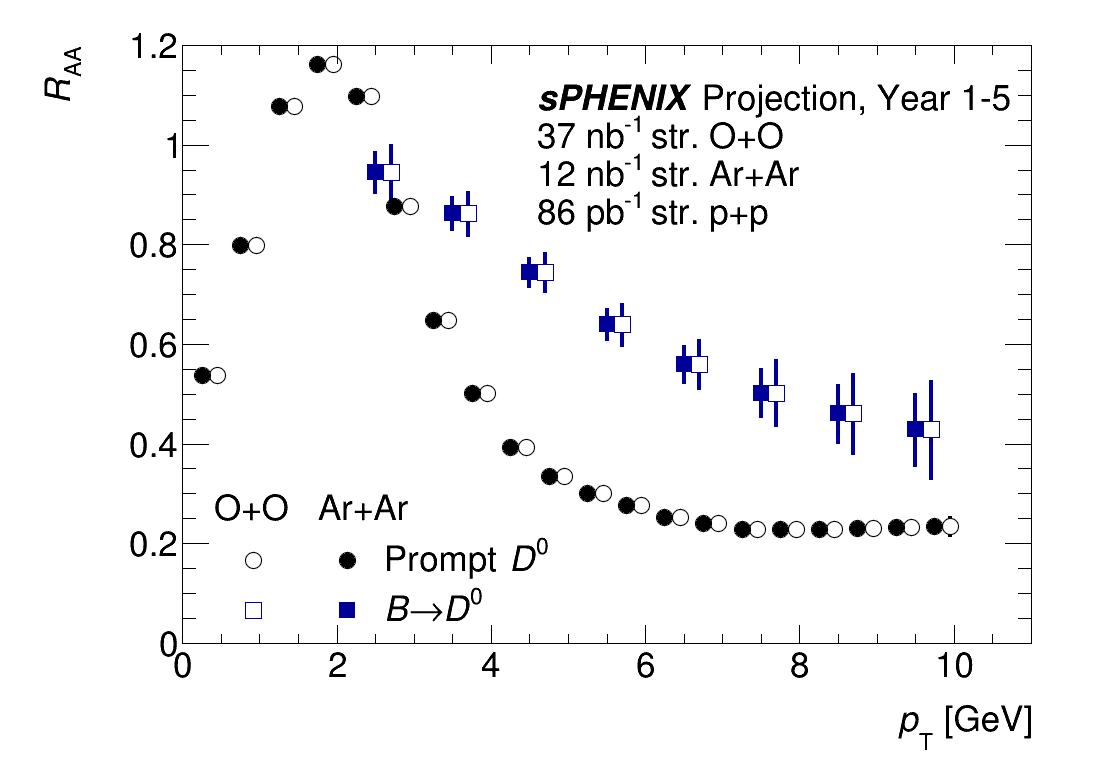

removed ‘fig_BUP2020/D0_BUP2020OOArAr_RAA_5yr.svg’


Info in <TCanvas::SaveSource>: C++ Macro file: fig_BUP2020/D0_BUP2020OOArAr_RAA_5yr.C has been generated


In [21]:
{
    TString s_suffix = "_5yr";

    TGraphErrors * grProD0_RAA_OO_5year 
        = GraphShiftCut(
            Significance2RAA( gProD0_Significance_OO_5year, gProD0_Significance_pp_5year, RAA_D),
            0.2, 0,100);
    TGraphErrors * grNonProD0_RAA_OO_5year 
        = GraphShiftCut(
            Significance2RAA( gNonProD0_Significance_OO_5year, gNonProD0_Significance_pp_5year, RAA_D0_B),
            0.2, 1.9,100);
    

    TGraphErrors * grProD0_RAA_ArAr_5year 
        = GraphShiftCut(Significance2RAA( gProD0_Significance_ArAr_5year, gProD0_Significance_pp_5year, RAA_D),
            0., 0,100);
    TGraphErrors * grNonProD0_RAA_ArAr_5year 
        = GraphShiftCut(
            Significance2RAA( gNonProD0_Significance_ArAr_5year, gNonProD0_Significance_pp_5year, RAA_D0_B),
            0., 1.9,100);
    
    grProD0_RAA_OO_5year->SetMarkerStyle(kOpenCircle);
    grNonProD0_RAA_OO_5year->SetMarkerStyle(kOpenSquare);
    grProD0_RAA_ArAr_5year->SetMarkerStyle(kFullCircle);
    grNonProD0_RAA_ArAr_5year->SetMarkerStyle(kFullSquare);
    
    
    grProD0_RAA_OO_5year->SetMarkerSize(2);
    grNonProD0_RAA_OO_5year->SetMarkerSize(2);
    grProD0_RAA_ArAr_5year->SetMarkerSize(2);
    grNonProD0_RAA_ArAr_5year->SetMarkerSize(2);
    
    grProD0_RAA_OO_5year->SetLineWidth(4);
    grNonProD0_RAA_OO_5year->SetLineWidth(4);
    grProD0_RAA_ArAr_5year->SetLineWidth(4);
    grNonProD0_RAA_ArAr_5year->SetLineWidth(4);
    
    grProD0_RAA_OO_5year->SetLineColorAlpha(kBlack, 1);
    grNonProD0_RAA_OO_5year->SetLineColorAlpha(kBlue+2, 1);
    grProD0_RAA_ArAr_5year->SetLineColorAlpha(kBlack, 1);
    grNonProD0_RAA_ArAr_5year->SetLineColorAlpha(kBlue+2, 1);
    
    grProD0_RAA_OO_5year->SetMarkerColorAlpha(kBlack, 1);
    grNonProD0_RAA_OO_5year->SetMarkerColorAlpha(kBlue+2, 1);
    grProD0_RAA_ArAr_5year->SetMarkerColorAlpha(kBlack, 1);
    grNonProD0_RAA_ArAr_5year->SetMarkerColorAlpha(kBlue+2, 1);
        
    TCanvas *c1 = new TCanvas("D0_BUP2020OOArAr_RAA" + s_suffix,
                  "D0_BUP2020OOArArO_RAA" + s_suffix, 1100, 800);
    c1->Divide(1, 1);
    int idx = 1;
    TPad *p;

    p = (TPad *) c1->cd(idx++);
    c1->Update();
    p->DrawFrame(0, 0, 11, 1.2)->SetTitle(";#it{p}_{T} [GeV];#it{R}_{AA}");
    
    grProD0_RAA_OO_5year->DrawClone("p");
    grNonProD0_RAA_OO_5year->DrawClone("p");
    
    grProD0_RAA_ArAr_5year->DrawClone("p");
    grNonProD0_RAA_ArAr_5year->DrawClone("p");
    
    TLegend *leg = new TLegend(.37, .7, .85, .9);
    leg->SetFillStyle(0);
    leg->AddEntry("", "#it{#bf{sPHENIX}} Projection, Year 1-5", "");
    leg->AddEntry("", Form("%.0f nb^{-1} str. O+O", OO_rec_5year/1e9), "");
    leg->AddEntry("", Form("%.0f nb^{-1} str. Ar+Ar", ArAr_rec_5year/1e9), "");
    leg->AddEntry("", Form("%.0f pb^{-1} str. p+p", pp_rec_5year/1e12), "");
    leg->Draw();
    
    leg = new TLegend(.18, .17, .55, .37, "O+O");
    leg->SetFillStyle(0);
    leg->AddEntry(grProD0_RAA_OO_5year, " ", "p");
    leg->AddEntry(grNonProD0_RAA_OO_5year, " ", "p");
    leg->Draw();
    
    leg = new TLegend(.28, .17, .55, .37, "Ar+Ar");
    leg->SetFillStyle(0);
    leg->AddEntry(grProD0_RAA_ArAr_5year, "Prompt #it{D}^{0}", "p");
    leg->AddEntry(grNonProD0_RAA_ArAr_5year, "#it{B}#rightarrow#it{D}^{0}", "p");
    leg->Draw();

    c1->Draw();
    SaveCanvas(c1, "fig_BUP2020/" + TString(c1->GetName()), kTRUE);
}

Info in <TCanvas::Print>: png file fig_BUP2020/D0_BUP2020OOArAr_RAA_flat_5yr.png has been created


Save TH1 hframe
Save TGraph Graph
Save TGraph Graph
Save TGraph Graph
Save TGraph Graph


Info in <TCanvas::SaveAs>: ROOT file fig_BUP2020/D0_BUP2020OOArAr_RAA_flat_5yr.root has been created
Info in <TCanvas::Print>: eps file fig_BUP2020/D0_BUP2020OOArAr_RAA_flat_5yr.eps has been created
Info in <TCanvas::Print>: SVG file fig_BUP2020/D0_BUP2020OOArAr_RAA_flat_5yr.svg has been created


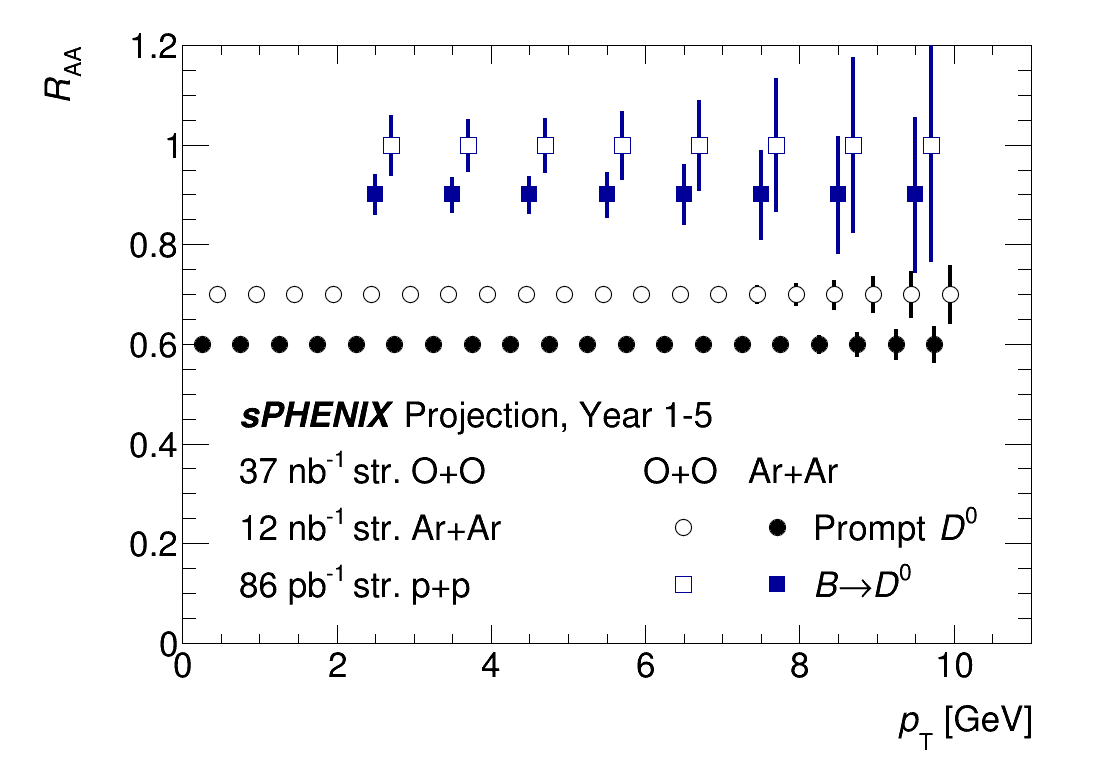

removed ‘fig_BUP2020/D0_BUP2020OOArAr_RAA_flat_5yr.svg’


Info in <TCanvas::SaveSource>: C++ Macro file: fig_BUP2020/D0_BUP2020OOArAr_RAA_flat_5yr.C has been generated


In [22]:
{
    TString s_suffix = "_5yr";

    TGraphErrors * grProD0_RAA_OO_5year 
        = GraphShiftCut(
            Significance2RAA( gProD0_Significance_OO_5year, gProD0_Significance_pp_5year, .7),
            0.2, 0,100);
    TGraphErrors * grNonProD0_RAA_OO_5year 
        = GraphShiftCut(
            Significance2RAA( gNonProD0_Significance_OO_5year, gNonProD0_Significance_pp_5year, 1),
            0.2, 1.9,100);
    

    TGraphErrors * grProD0_RAA_ArAr_5year 
        = GraphShiftCut(Significance2RAA( gProD0_Significance_ArAr_5year, gProD0_Significance_pp_5year, .6),
            0., 0,100);
    TGraphErrors * grNonProD0_RAA_ArAr_5year 
        = GraphShiftCut(
            Significance2RAA( gNonProD0_Significance_ArAr_5year, gNonProD0_Significance_pp_5year, .9),
            0., 1.9,100);
    
    grProD0_RAA_OO_5year->SetMarkerStyle(kOpenCircle);
    grNonProD0_RAA_OO_5year->SetMarkerStyle(kOpenSquare);
    grProD0_RAA_ArAr_5year->SetMarkerStyle(kFullCircle);
    grNonProD0_RAA_ArAr_5year->SetMarkerStyle(kFullSquare);
    
    
    grProD0_RAA_OO_5year->SetMarkerSize(2);
    grNonProD0_RAA_OO_5year->SetMarkerSize(2);
    grProD0_RAA_ArAr_5year->SetMarkerSize(2);
    grNonProD0_RAA_ArAr_5year->SetMarkerSize(2);
    
    grProD0_RAA_OO_5year->SetLineWidth(4);
    grNonProD0_RAA_OO_5year->SetLineWidth(4);
    grProD0_RAA_ArAr_5year->SetLineWidth(4);
    grNonProD0_RAA_ArAr_5year->SetLineWidth(4);
    
    grProD0_RAA_OO_5year->SetLineColorAlpha(kBlack, 1);
    grNonProD0_RAA_OO_5year->SetLineColorAlpha(kBlue+2, 1);
    grProD0_RAA_ArAr_5year->SetLineColorAlpha(kBlack, 1);
    grNonProD0_RAA_ArAr_5year->SetLineColorAlpha(kBlue+2, 1);
    
    grProD0_RAA_OO_5year->SetMarkerColorAlpha(kBlack, 1);
    grNonProD0_RAA_OO_5year->SetMarkerColorAlpha(kBlue+2, 1);
    grProD0_RAA_ArAr_5year->SetMarkerColorAlpha(kBlack, 1);
    grNonProD0_RAA_ArAr_5year->SetMarkerColorAlpha(kBlue+2, 1);
        
    TCanvas *c1 = new TCanvas("D0_BUP2020OOArAr_RAA_flat" + s_suffix,
                  "D0_BUP2020OOArArO_RAA_flat" + s_suffix, 1100, 800);
    c1->Divide(1, 1);
    int idx = 1;
    TPad *p;

    p = (TPad *) c1->cd(idx++);
    c1->Update();
    p->DrawFrame(0, 0, 11, 1.2)->SetTitle(";#it{p}_{T} [GeV];#it{R}_{AA}");
    
    grProD0_RAA_OO_5year->DrawClone("p");
    grNonProD0_RAA_OO_5year->DrawClone("p");
    
    grProD0_RAA_ArAr_5year->DrawClone("p");
    grNonProD0_RAA_ArAr_5year->DrawClone("p");
    
    TLegend *leg = new TLegend(.1, .2, .55, .5);
    leg->SetFillStyle(0);
    leg->AddEntry("", "#it{#bf{sPHENIX}} Projection, Year 1-5", "");
    leg->AddEntry("", Form("%.0f nb^{-1} str. O+O", OO_rec_5year/1e9), "");
    leg->AddEntry("", Form("%.0f nb^{-1} str. Ar+Ar", ArAr_rec_5year/1e9), "");
    leg->AddEntry("", Form("%.0f pb^{-1} str. p+p", pp_rec_5year/1e12), "");
    leg->Draw();
    
    leg = new TLegend(.58, .2, .95, .425,"O+O");
    leg->SetFillStyle(0);
    leg->AddEntry(grProD0_RAA_OO_5year, " ", "p");
    leg->AddEntry(grNonProD0_RAA_OO_5year, " ", "p");
    leg->Draw();
    
    leg = new TLegend(.68, .2, .95, .425,"Ar+Ar");
    leg->SetFillStyle(0);
    leg->AddEntry(grProD0_RAA_ArAr_5year, "Prompt #it{D}^{0}", "p");
    leg->AddEntry(grNonProD0_RAA_ArAr_5year, "#it{B}#rightarrow#it{D}^{0}", "p");
    leg->Draw();

    c1->Draw();
    SaveCanvas(c1, "fig_BUP2020/" + TString(c1->GetName()), kTRUE);
}

# v2 projection

## Utilities

v2 formula is Eq (3) of sPH-HF-2017-002

In [23]:
%%cpp -d

Double_t v2_err(Double_t sig, Double_t v2, Double_t Res)
{
  const Double_t Pi = 3.1415927;
  return Pi/4 / sig * sqrt(1 - 16 * v2 * v2 / Pi / Pi) / Res;  //Eq (3) of sPH-HF-2017-002
}

TGraphErrors *Significance2v2(const TGraph *AASignificance, double v2_centroid, Double_t Res, const int n_rebin=1)
{
    assert(AASignificance);
    
    
    const int npoint = AASignificance->GetN() ;
    assert(npoint%n_rebin == 0);
    
    TVectorD significance(npoint/n_rebin);
    TVectorD x_center(npoint/n_rebin);
    
    
    for (int i = 0; i<npoint/n_rebin; ++i)
    {
        significance[i] = 0;
        x_center[i] = 0;
        for (int j = 0; j<n_rebin; ++j)
        {
            
            significance[i] += pow(AASignificance->GetY()[i*n_rebin + j],2);
            x_center[i] += AASignificance->GetX()[i*n_rebin + j];
                
        }
    
        significance[i] = sqrt(significance[i]);
        x_center[i] /= n_rebin;
    }
    
    
    TVectorD y(npoint/n_rebin);
    TVectorD ex(npoint/n_rebin);
    TVectorD ey(npoint/n_rebin);
    
    for (int i = 0; i<npoint/n_rebin; ++i)
    {
        y[i] = v2_centroid;   
        ey[i] = v2_err (significance[i], y[i], Res);        
    }    
    
    TGraphErrors * gr = new TGraphErrors(x_center, y, ex, ey);
    
    return gr;
}


Info in <TCanvas::Print>: png file fig_BUP2020/D0_BUP2020OOArAr_v2_5yr.png has been created


Save TH1 hframe
Save TGraph Graph
Save TGraph Graph


Info in <TCanvas::SaveAs>: ROOT file fig_BUP2020/D0_BUP2020OOArAr_v2_5yr.root has been created


Save TGraph Graph
Save TGraph Graph


Info in <TCanvas::Print>: eps file fig_BUP2020/D0_BUP2020OOArAr_v2_5yr.eps has been created
Info in <TCanvas::Print>: SVG file fig_BUP2020/D0_BUP2020OOArAr_v2_5yr.svg has been created


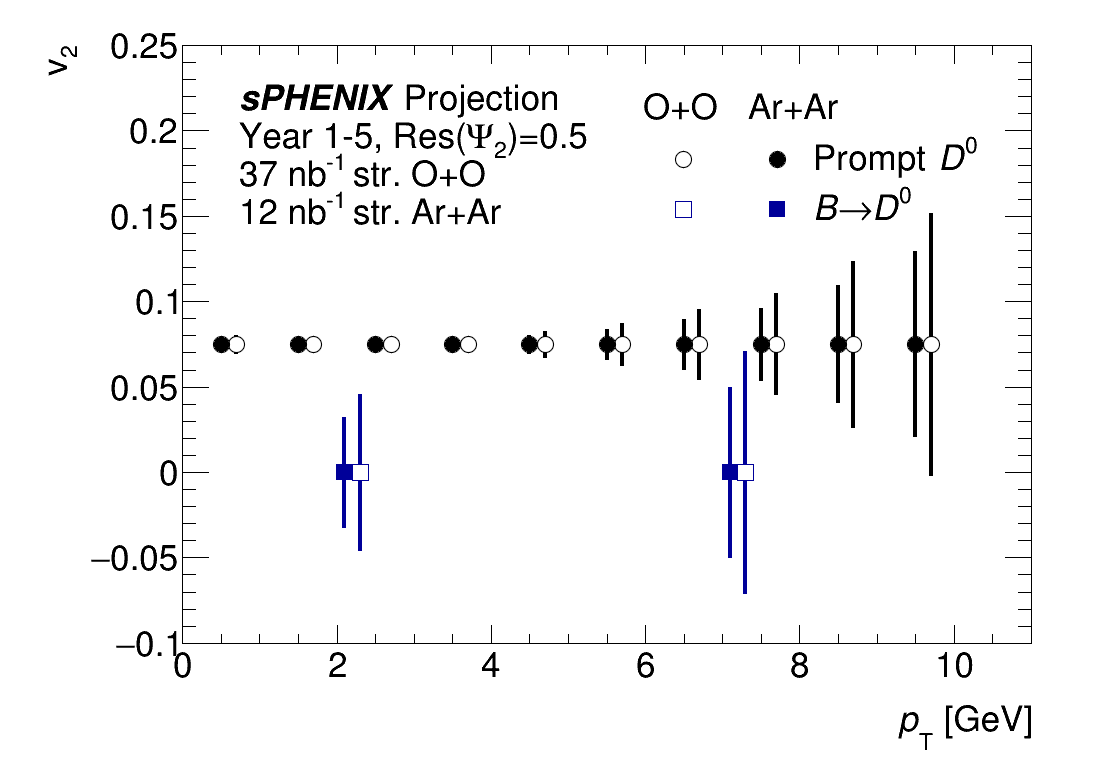

removed ‘fig_BUP2020/D0_BUP2020OOArAr_v2_5yr.svg’


Info in <TCanvas::SaveSource>: C++ Macro file: fig_BUP2020/D0_BUP2020OOArAr_v2_5yr.C has been generated


In [24]:
{
    TString s_suffix = "_5yr";

    TGraphErrors * grProD0_v2_OO_5year 
        = GraphShiftCut(
            Significance2v2( gProD0_Significance_OO_5year, 0.075, Psi2_resolution, 2),
            0.2, 0,100);
    TGraphErrors * grNonProD0_v2_OO_5year 
        = GraphShiftCut(
            Significance2v2( gNonProD0_Significance_OO_5year, 0, Psi2_resolution, 5),
            -.2, 1.9,100);    

    TGraphErrors * grProD0_v2_ArAr_5year 
        = GraphShiftCut(Significance2v2( gProD0_Significance_ArAr_5year, 0.075, Psi2_resolution, 2),
            0., 0,100);
    TGraphErrors * grNonProD0_v2_ArAr_5year 
        = GraphShiftCut(
            Significance2v2( gNonProD0_Significance_ArAr_5year, 0, Psi2_resolution, 5),
            -.4, 1.9,100);
    
    grProD0_v2_OO_5year->SetMarkerStyle(kOpenCircle);
    grNonProD0_v2_OO_5year->SetMarkerStyle(kOpenSquare);
    grProD0_v2_ArAr_5year->SetMarkerStyle(kFullCircle);
    grNonProD0_v2_ArAr_5year->SetMarkerStyle(kFullSquare);
    
    grProD0_v2_OO_5year->SetMarkerSize(2);
    grNonProD0_v2_OO_5year->SetMarkerSize(2);
    grProD0_v2_ArAr_5year->SetMarkerSize(2);
    grNonProD0_v2_ArAr_5year->SetMarkerSize(2);
        
    grProD0_v2_OO_5year->SetLineWidth(4);
    grNonProD0_v2_OO_5year->SetLineWidth(4);
    grProD0_v2_ArAr_5year->SetLineWidth(4);
    grNonProD0_v2_ArAr_5year->SetLineWidth(4);
    
    grProD0_v2_OO_5year->SetLineColorAlpha(kBlack, 1);
    grNonProD0_v2_OO_5year->SetLineColorAlpha(kBlue+2, 1);
    grProD0_v2_ArAr_5year->SetLineColorAlpha(kBlack, 1);
    grNonProD0_v2_ArAr_5year->SetLineColorAlpha(kBlue+2, 1);
    
    grProD0_v2_OO_5year->SetMarkerColorAlpha(kBlack, 1);
    grNonProD0_v2_OO_5year->SetMarkerColorAlpha(kBlue+2, 1);
    grProD0_v2_ArAr_5year->SetMarkerColorAlpha(kBlack, 1);
    grNonProD0_v2_ArAr_5year->SetMarkerColorAlpha(kBlue+2, 1);
        
    TCanvas *c1 = new TCanvas("D0_BUP2020OOArAr_v2" + s_suffix,
                  "D0_BUP2020OOArArO_v2" + s_suffix, 1100, 800);
    c1->Divide(1, 1);
    int idx = 1;
    TPad *p;

    p = (TPad *) c1->cd(idx++);
    c1->Update();
    p->DrawFrame(0, -.1, 11, 0.25)->SetTitle(";#it{p}_{T} [GeV];v_{2}");
    
    grProD0_v2_OO_5year->DrawClone("p");
    grNonProD0_v2_OO_5year->DrawClone("p");
    
    grProD0_v2_ArAr_5year->DrawClone("p");
    grNonProD0_v2_ArAr_5year->DrawClone("p");
    
    TLegend *leg = new TLegend(.1, .7, .55, .9);
    leg->SetFillStyle(0);
    leg->AddEntry("", "#it{#bf{sPHENIX}} Projection", "");
    leg->AddEntry("", Form("Year 1-5, Res(#Psi_{2})=%.1f", Psi2_resolution), "");
    leg->AddEntry("", Form("%.0f nb^{-1} str. O+O", OO_rec_5year/1e9), "");
    leg->AddEntry("", Form("%.0f nb^{-1} str. Ar+Ar", ArAr_rec_5year/1e9), "");
    leg->Draw();
    
    leg = new TLegend(.58, .7, .95, .9, "O+O");
    leg->SetFillStyle(0);
    leg->AddEntry(grProD0_v2_OO_5year, " ", "p");
    leg->AddEntry(grNonProD0_v2_OO_5year, " ", "p");
    leg->Draw();
    
    leg = new TLegend(.68, .7, .95, .9, "Ar+Ar");
    leg->SetFillStyle(0);
    leg->AddEntry(grProD0_v2_ArAr_5year, "Prompt #it{D}^{0}", "p");
    leg->AddEntry(grNonProD0_v2_ArAr_5year, "#it{B}#rightarrow#it{D}^{0}", "p");
    leg->Draw();

    c1->Draw();
    SaveCanvas(c1, "fig_BUP2020/" + TString(c1->GetName()), kTRUE);
}

# AN projection

## Utilities


In [25]:
%%cpp -d


TGraphErrors *Significance2AN(
    const TGraph *ppSignificance,
    double AN_centroid,
    Double_t Res, 
    const int n_rebin=1)
{
    assert(ppSignificance);    
    
    const int npoint = ppSignificance->GetN() ;
    assert(npoint%n_rebin == 0);
    
    TVectorD significance(npoint/n_rebin);
    TVectorD x_center(npoint/n_rebin);
    
    for (int i = 0; i<npoint/n_rebin; ++i)
    {
        significance[i] = 0;
        x_center[i] = 0;
        for (int j = 0; j<n_rebin; ++j)
        {
            
            significance[i] += pow(ppSignificance->GetY()[i*n_rebin + j],2);
            x_center[i] += ppSignificance->GetX()[i*n_rebin + j];
                
        }
    
        significance[i] = sqrt(significance[i]);
        x_center[i] /= n_rebin;
    }
    
    TVectorD y(npoint/n_rebin);
    TVectorD ex(npoint/n_rebin);
    TVectorD ey(npoint/n_rebin);
    
    for (int i = 0; i<npoint/n_rebin; ++i)
    {
        y[i] = AN_centroid;   
        ey[i] = 1/sqrt(2)/significance[i]/Res; // AN error in max likelihood estimator        
    }    
    
    TGraphErrors * gr = new TGraphErrors(x_center, y, ex, ey);
    
    return gr;
}

## Model inputs

In [26]:
%%cpp -d

pair<TGraph *, TGraph *> getD0AN()
{
  //  DOI:  10.1103/PhysRevD.78.114013
  //  Cite as:  arXiv:0810.3333 [hep-ph]
  // Fig 6 D0

  const vector<double> pT_07_07 = {

      1.02731939860653e+000,
      1.06765676567657e+000,
      1.10726072607261e+000,
      1.14759809314265e+000,
      1.18793546021269e+000,
      1.22753942060873e+000,
      1.26787678767877e+000,
      1.30821415474881e+000,
      1.34781811514485e+000,
      1.38815548221489e+000,
      1.42775944261093e+000,
      1.46809680968097e+000,
      1.50843417675101e+000,
      1.54803813714705e+000,
      1.58837550421709e+000,
      1.62871287128713e+000,
      1.66831683168317e+000,
      1.70865419875321e+000,
      1.74899156582325e+000,
      1.78859552621929e+000,
      1.82893289328933e+000,
      1.86853685368537e+000,
      1.90887422075541e+000,
      1.94921158782545e+000,
      1.98881554822149e+000,
      2.02915291529153e+000,
      2.06949028236157e+000,
      2.10909424275761e+000,
      2.14943160982765e+000,
      2.18903557022369e+000,
      2.22937293729373e+000,
      2.26971030436377e+000,
      2.30931426475981e+000,
      2.34965163182985e+000,
      2.38998899889989e+000,
      2.42959295929593e+000,
      2.46993032636597e+000,
      2.51026769343601e+000,
      2.54987165383205e+000,
      2.59020902090209e+000,
      2.62981298129813e+000,
      2.67015034836817e+000,
      2.71048771543821e+000,
      2.75009167583425e+000,
      2.79042904290429e+000,
      2.83076640997433e+000,
      2.87037037037037e+000,
      2.91070773744041e+000,
      2.95031169783645e+000,
      2.99064906490649e+000,
      3.03098643197653e+000,
      3.07059039237257e+000,
      3.11092775944261e+000,
      3.15126512651265e+000,
      3.19086908690869e+000,
      3.23120645397873e+000,
      3.27081041437477e+000,
      3.31114778144481e+000,
      3.35148514851485e+000,
      3.39108910891089e+000,
      3.43142647598093e+000,
      3.47176384305097e+000,
      3.51136780344701e+000,
      3.55170517051705e+000,
      3.59204253758709e+000,
      3.63164649798313e+000,
      3.67198386505317e+000,
      3.71158782544921e+000,
      3.75192519251925e+000,
      3.79226255958929e+000,
      3.83186651998533e+000,
      3.87220388705537e+000,
      3.91254125412541e+000,
      3.95214521452145e+000,
      3.99248258159149e+000

  };

  const vector<double> AN_07_07 = {
      -1.25647231389806e-002,
      -1.24874781595807e-002,
      -1.23709959231217e-002,
      -1.22872149960094e-002,
      -1.21968981211847e-002,
      -1.20804158847257e-002,
      -1.20031709053258e-002,
      -1.19063180827887e-002,
      -1.17898358463297e-002,
      -1.16733751806553e-002,
      -1.16091805258957e-002,
      -1.14992558079337e-002,
      -1.13827951422593e-002,
      -1.13186004874997e-002,
      -1.12086757695377e-002,
      -1.10922151038633e-002,
      -1.09822688151168e-002,
      -1.08984878880045e-002,
      -1.08016350654673e-002,
      -1.06851528290084e-002,
      -1.05686921633340e-002,
      -1.04522099268750e-002,
      -1.03618930520503e-002,
      -1.02258245432386e-002,
      -1.01550939407666e-002,
      -1.00451692228046e-002,
      -9.92870855713022e-003,
      -9.83837011152095e-003,
      -9.75458918440864e-003,
      -9.63810694794969e-003,
      -9.57393386397463e-003,
      -9.46400914601264e-003,
      -9.36059880497854e-003,
      -9.28988977329106e-003,
      -9.19303695075390e-003,
      -9.11577040056947e-003,
      -9.02545352574473e-003,
      -8.94167259863241e-003,
      -8.87747794387282e-003,
      -8.77408917362324e-003,
      -8.70989451886365e-003,
      -8.65225738260101e-003,
      -8.54886861235143e-003,
      -8.47813800987942e-003,
      -8.42050087361677e-003,
      -8.32364805107962e-003,
      -8.24638150089519e-003,
      -8.18874436463254e-003,
      -8.13108565758537e-003,
      -8.04076878276063e-003,
      -7.97005975107315e-003,
      -7.89932914860113e-003,
      -7.84169201233849e-003,
      -7.78405487607584e-003,
      -7.72639616902867e-003,
      -7.66875903276602e-003,
      -7.57842058715676e-003,
      -7.50117560775685e-003,
      -7.44353847149421e-003,
      -7.40548760758429e-003,
      -7.34785047132164e-003,
      -7.27060549192174e-003,
      -7.20641083716215e-003,
      -7.14877370089950e-003,
      -7.09113656463686e-003,
      -7.03347785758968e-003,
      -6.97584072132703e-003,
      -6.95086175284195e-003,
      -6.89976056429172e-003,
      -6.86173127116633e-003,
      -6.80407256411916e-003,
      -6.74643542785651e-003,
      -6.68879829159387e-003,
      -6.63113958454669e-003,
      -6.60618218684613e-003

  };

  const vector<double> pT_0_0 = {

      1.02731939860653e+000,
      1.10726072607261e+000,
      1.18793546021269e+000,
      1.26787678767877e+000,
      1.34781811514485e+000,
      1.42775944261093e+000,
      1.54803813714705e+000,
      1.62871287128713e+000,
      1.70865419875321e+000,
      1.78859552621929e+000,
      1.86853685368537e+000,
      1.94921158782545e+000,
      2.02915291529153e+000,
      2.10909424275761e+000,
      2.18903557022369e+000,
      2.22937293729373e+000,
      2.30931426475981e+000,
      2.38998899889989e+000,
      2.46993032636597e+000,
      2.54987165383205e+000,
      2.62981298129813e+000,
      2.71048771543821e+000,
      2.79042904290429e+000,
      2.87037037037037e+000,
      2.99064906490649e+000,
      3.07059039237257e+000,
      3.15126512651265e+000,
      3.23120645397873e+000,
      3.31114778144481e+000,
      3.39108910891089e+000,
      3.47176384305097e+000,
      3.55170517051705e+000,
      3.63164649798313e+000,
      3.71158782544921e+000,
      3.83186651998533e+000,
      3.91254125412541e+000,
      3.99248258159149e+000

  };

  const vector<double> AN_0_0 = {

      -3.42500916758342e-004,
      -3.44852132272051e-004,
      -3.73368709419959e-004,
      -3.75719924933668e-004,
      -3.78071140447377e-004,
      -3.80422355961085e-004,
      -3.83959964623915e-004,
      -4.45156280333918e-004,
      -4.47507495847623e-004,
      -4.49858711361332e-004,
      -4.52209926875041e-004,
      -4.54582713173279e-004,
      -4.56933928686988e-004,
      -4.85428935050370e-004,
      -5.20459889126169e-004,
      -5.15110334562866e-004,
      -5.23997497788992e-004,
      -5.26370284087231e-004,
      -5.28721499600940e-004,
      -5.57216505964322e-004,
      -5.72639616902865e-004,
      -5.94620246338360e-004,
      -5.96971461852065e-004,
      -6.32002415927865e-004,
      -6.61683815440368e-004,
      -6.64035030954076e-004,
      -6.99087555814406e-004,
      -7.27582562177788e-004,
      -7.29933777691497e-004,
      -7.32284993205202e-004,
      -7.34657779503441e-004,
      -7.63152785866823e-004,
      -7.98183739942622e-004,
      -8.00534955456331e-004,
      -8.62896093530921e-004,
      -8.65268879829160e-004,
      -8.67620095342865e-004

  };

  const vector<double> pT_07_n07 = {

      1.00751741840851e+000,
      1.01778511184452e+000,
      1.04785478547855e+000,
      1.05738907224056e+000,
      1.08745874587459e+000,
      1.09772643931060e+000,
      1.13733039970664e+000,
      1.17766776677668e+000,
      1.18793546021269e+000,
      1.21800513384672e+000,
      1.22753942060873e+000,
      1.25760909424276e+000,
      1.26787678767877e+000,
      1.29794646131280e+000,
      1.30821415474881e+000,
      1.33828382838284e+000,
      1.34781811514485e+000,
      1.38815548221489e+000,
      1.42775944261093e+000,
      1.46809680968097e+000,
      1.50843417675101e+000,
      1.54803813714705e+000,
      1.58837550421709e+000,
      1.61844517785112e+000,
      1.62871287128713e+000,
      1.65878254492116e+000,
      1.66831683168317e+000,
      1.69838650531720e+000,
      1.70865419875321e+000,
      1.72845617895123e+000,
      1.73872387238724e+000,
      1.76879354602127e+000,
      1.77906123945728e+000,
      1.79886321965530e+000,
      1.80839750641731e+000,
      1.83846718005134e+000,
      1.84873487348735e+000,
      1.86853685368537e+000,
      1.87880454712138e+000,
      1.89860652731940e+000,
      1.90887422075541e+000,
      1.93894389438944e+000,
      1.94921158782545e+000,
      1.96901356802347e+000,
      1.97928126145948e+000,
      2.00935093509351e+000,
      2.01888522185552e+000,
      2.03942060872754e+000,
      2.04895489548955e+000,
      2.06949028236157e+000,
      2.07902456912358e+000,
      2.10909424275761e+000,
      2.11936193619362e+000,
      2.14943160982765e+000,
      2.15896589658966e+000,
      2.17950128346168e+000,
      2.18903557022369e+000,
      2.20957095709571e+000,
      2.21910524385772e+000,
      2.24917491749175e+000,
      2.25944261092776e+000,
      2.27924459112578e+000,
      2.28951228456179e+000,
      2.31958195819582e+000,
      2.32984965163183e+000,
      2.35991932526586e+000,
      2.36945361202787e+000,
      2.39952328566190e+000,
      2.40979097909791e+000,
      2.43986065273194e+000,
      2.45012834616795e+000,
      2.46993032636597e+000,
      2.48019801980198e+000,
      2.51026769343601e+000,
      2.51980198019802e+000,
      2.54987165383205e+000,
      2.57994132746608e+000,
      2.59020902090209e+000,
      2.62027869453612e+000,
      2.62981298129813e+000,
      2.65988265493216e+000,
      2.68995232856619e+000,
      2.70022002200220e+000,
      2.73028969563623e+000,
      2.74055738907224e+000,
      2.77062706270627e+000,
      2.78016134946828e+000,
      2.80069673634030e+000,
      2.81023102310231e+000,
      2.84030069673634e+000,
      2.85056839017235e+000,
      2.88063806380638e+000,
      2.89017235056839e+000,
      2.92024202420242e+000,
      2.93050971763843e+000,
      2.96057939127246e+000,
      2.97084708470847e+000,
      3.00091675834250e+000,
      3.01045104510451e+000,
      3.04052071873854e+000,
      3.05078841217455e+000,
      3.08085808580858e+000,
      3.11092775944261e+000,
      3.12119545287862e+000,
      3.15126512651265e+000,
      3.16079941327466e+000,
      3.19086908690869e+000,
      3.20113678034470e+000,
      3.23120645397873e+000,
      3.24074074074074e+000,
      3.27081041437477e+000,
      3.28107810781078e+000,
      3.31114778144481e+000,
      3.32141547488082e+000,
      3.35148514851485e+000,
      3.36101943527686e+000,
      3.39108910891089e+000,
      3.40135680234690e+000,
      3.43142647598093e+000,
      3.47176384305097e+000,
      3.48129812981298e+000,
      3.51136780344701e+000,
      3.52163549688302e+000,
      3.55170517051705e+000,
      3.56197286395306e+000,
      3.59204253758709e+000,
      3.60157682434910e+000,
      3.63164649798313e+000,
      3.64191419141914e+000,
      3.67198386505317e+000,
      3.68151815181518e+000,
      3.71158782544921e+000,
      3.72185551888522e+000,
      3.75192519251925e+000,
      3.76219288595526e+000,
      3.79226255958929e+000,
      3.80179684635130e+000,
      3.83186651998533e+000,
      3.84213421342134e+000,
      3.87220388705537e+000,
      3.88247158049138e+000,
      3.91254125412541e+000,
      3.92207554088742e+000,
      3.95214521452145e+000,
      3.96241290795746e+000};

  const vector<double> AN_07_n07 = {

      -2.49824413813930e-002,
      -2.49827433723765e-002,
      -2.49836277745422e-002,
      -2.49904441424535e-002,
      -2.48998252766453e-002,
      -2.50047024310274e-002,
      -2.49274358808430e-002,
      -2.49024784831424e-002,
      -2.49616040035376e-002,
      -2.48513772945922e-002,
      -2.48778015056408e-002,
      -2.48133264306823e-002,
      -2.47874846308160e-002,
      -2.47164736081451e-002,
      -2.47298474945534e-002,
      -2.46130848378956e-002,
      -2.46721887875062e-002,
      -2.45818719126815e-002,
      -2.44588537285101e-002,
      -2.43358571151233e-002,
      -2.42193964494489e-002,
      -2.40898423175651e-002,
      -2.39472378610410e-002,
      -2.37389719364093e-002,
      -2.38242412476542e-002,
      -2.36225112707349e-002,
      -2.36620073772083e-002,
      -2.34537414525766e-002,
      -2.35063310252594e-002,
      -2.32127957893829e-002,
      -2.32784572574905e-002,
      -2.30244396988719e-002,
      -2.30966371146919e-002,
      -2.28161737742402e-002,
      -2.28491339330011e-002,
      -2.26212601652322e-002,
      -2.26280981039280e-002,
      -2.23541707111888e-002,
      -2.24198321792964e-002,
      -2.21589766819819e-002,
      -2.21527427252529e-002,
      -2.19248689574840e-002,
      -2.19839944778792e-002,
      -2.17100670851399e-002,
      -2.17365128669730e-002,
      -2.15086390992040e-002,
      -2.15154554671153e-002,
      -2.12480855928730e-002,
      -2.12810457516340e-002,
      -2.10202118251041e-002,
      -2.10466360361526e-002,
      -2.08187622683837e-002,
      -2.08452080502168e-002,
      -2.06434780732975e-002,
      -2.06372225457840e-002,
      -2.03959964623913e-002,
      -2.04551004120020e-002,
      -2.01681226946224e-002,
      -2.02141547488082e-002,
      -1.99928169287517e-002,
      -2.00519424491469e-002,
      -1.98172307426821e-002,
      -1.98175327336655e-002,
      -1.96092668090338e-002,
      -1.96422485385793e-002,
      -1.94470545093725e-002,
      -1.94669427727086e-002,
      -1.92848206389266e-002,
      -1.92916585776225e-002,
      -1.91095364438405e-002,
      -1.91163743825363e-002,
      -1.88816626760715e-002,
      -1.89211803533295e-002,
      -1.87259863241226e-002,
      -1.87654824305960e-002,
      -1.85637524536767e-002,
      -1.83293427381954e-002,
      -1.83950042063030e-002,
      -1.81605944908216e-002,
      -1.82393062835695e-002,
      -1.80114325158006e-002,
      -1.78293103820186e-002,
      -1.78622921115641e-002,
      -1.76605621346448e-002,
      -1.77131517073276e-002,
      -1.75048857826959e-002,
      -1.75378459414569e-002,
      -1.73031558057767e-002,
      -1.73491878599625e-002,
      -1.71278500399060e-002,
      -1.71869755603011e-002,
      -1.70113893742315e-002,
      -1.70312776375677e-002,
      -1.68556914514981e-002,
      -1.68952091287560e-002,
      -1.66934791518368e-002,
      -1.67199249336698e-002,
      -1.65639465907375e-002,
      -1.65707629586488e-002,
      -1.64213205634289e-002,
      -1.64281585021247e-002,
      -1.62525723160551e-002,
      -1.60769861299855e-002,
      -1.61230397549559e-002,
      -1.59278457257490e-002,
      -1.59608058845100e-002,
      -1.57917556461529e-002,
      -1.58443452188356e-002,
      -1.56622230850536e-002,
      -1.56690394529649e-002,
      -1.55195970577450e-002,
      -1.55525787872905e-002,
      -1.53966004443582e-002,
      -1.54099743307664e-002,
      -1.52474600401217e-002,
      -1.52608123557454e-002,
      -1.51179059082379e-002,
      -1.52031752194827e-002,
      -1.49883733471386e-002,
      -1.48719126814642e-002,
      -1.49114087879376e-002,
      -1.47292866541556e-002,
      -1.47949481222632e-002,
      -1.45997540930564e-002,
      -1.46784874565888e-002,
      -1.44767574796695e-002,
      -1.45620052201299e-002,
      -1.43341314523609e-002,
      -1.44324726590306e-002,
      -1.42699583683859e-002,
      -1.43094544748593e-002,
      -1.41534761319269e-002,
      -1.41864578614724e-002,
      -1.40370154662525e-002,
      -1.40699971957980e-002,
      -1.39597704868526e-002,
      -1.39404430639142e-002,
      -1.38432882503937e-002,
      -1.38566621368019e-002,
      -1.37072197415820e-002,
      -1.37467374188399e-002,
      -1.36169028667573e-002,
      -1.36302551823810e-002,
      -1.35134925257232e-002,
      -1.35660820984059e-002};

  TGraph *g_07_07 = new TGraph(pT_07_07.size(), pT_07_07.data(), AN_07_07.data());
  TGraph *g_0_0 = new TGraph(pT_0_0.size(), pT_0_0.data(), AN_0_0.data());
  TGraph *g_07_n07 = new TGraph(pT_07_n07.size(), pT_07_n07.data(), AN_07_n07.data());

  vector<double> pt_0;
  vector<double> AN_0;
  vector<double> pt_07;
  vector<double> AN_07;

  for (double pt = 1; pt < 4; pt += .1)
  {
    pt_0.push_back(pt);
    pt_07.push_back(pt);

    AN_0.push_back(g_0_0->Eval(pt));
    AN_07.push_back(0.5 * (g_07_07->Eval(pt) + g_07_n07->Eval(pt)));
  }

  return make_pair(
      new TGraph(pt_0.size(), pt_0.data(), AN_0.data()),
      new TGraph(pt_07.size(), pt_07.data(), AN_07.data()));
}

## Projections

Info in <TCanvas::Print>: png file fig_BUP2020/D0_BUP2020_AN_3yr.png has been created


Save TH1 hframe
Save TGraph Graph
Save TGraph Graph
Save TGraph Graph


Info in <TCanvas::SaveAs>: ROOT file fig_BUP2020/D0_BUP2020_AN_3yr.root has been created
Info in <TCanvas::Print>: eps file fig_BUP2020/D0_BUP2020_AN_3yr.eps has been created
Info in <TCanvas::Print>: SVG file fig_BUP2020/D0_BUP2020_AN_3yr.svg has been created


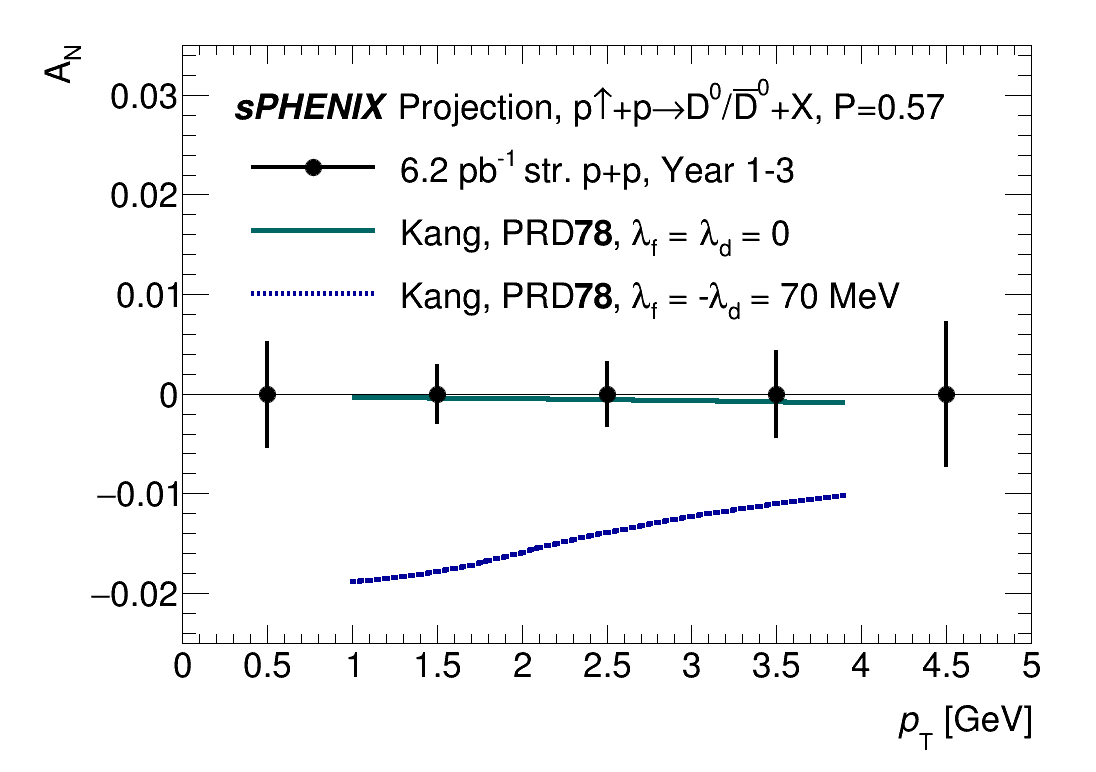

removed ‘fig_BUP2020/D0_BUP2020_AN_3yr.svg’


Info in <TCanvas::SaveSource>: C++ Macro file: fig_BUP2020/D0_BUP2020_AN_3yr.C has been generated


In [27]:
{

    TGraphErrors * grProD0_AN_pp_3year 
        = GraphShiftCut(
            Significance2AN( gProD0_Significance_pp_3year, 0, pp_beam_pol, 2),
            0., 0,100);
    TGraphErrors * grProD0_AN_pp_5year 
        = GraphShiftCut(
            Significance2AN( gProD0_Significance_pp_5year, 0, pp_beam_pol, 1),
            0., 0,100);
    
    grProD0_AN_pp_3year->SetMarkerStyle(kFullCircle);
    grProD0_AN_pp_5year->SetMarkerStyle(kFullCircle);
    
    grProD0_AN_pp_3year->SetMarkerSize(2);
    grProD0_AN_pp_5year->SetMarkerSize(2);
        
    grProD0_AN_pp_3year->SetLineWidth(4);
    grProD0_AN_pp_5year->SetLineWidth(4);
    
    grProD0_AN_pp_3year->SetLineColorAlpha(kBlack, 1);
    grProD0_AN_pp_5year->SetLineColorAlpha(kBlack, 1);
    
    grProD0_AN_pp_3year->SetMarkerColorAlpha(kBlack, 1);
    grProD0_AN_pp_5year->SetMarkerColorAlpha(kBlack, 1);
    
    
    
    auto gs = getD0AN();
    auto g0 = gs.first;
    auto g07 = gs.second;

    assert(g0);
    assert(g07);

        
    TCanvas *c1 = new TCanvas("D0_BUP2020_AN_3yr" ,
                  "D0_BUP2020OOArArO_AN_3yr" , 1100, 800);
    c1->Divide(1, 1);
    int idx = 1;
    TPad *p;

    p = (TPad *) c1->cd(idx++);
    c1->Update();
    p->DrawFrame(0, -.025, 5, 0.035)->SetTitle(";#it{p}_{T} [GeV];A_{N}");
    (new TLine(0, -.0, 5, .0))->Draw();
    
    g0->Draw("l");
    g0->SetLineColor(kCyan + 3);
    g0->SetLineWidth(5);

    g07->Draw("l");
    g07->SetLineStyle(kDashed);
    g07->SetLineColor(kBlue+2);
    g07->SetLineWidth(5);
    
    
    grProD0_AN_pp_3year->DrawClone("p");
//     grProD0_AN_pp_5year->DrawClone("p");
    
    TLegend *leg = new TLegend(.0, .8, .83, .95);
    leg->SetFillStyle(0);
//     leg->AddEntry("", "#it{#bf{sPHENIX}} Projection", "");
    leg->AddEntry("", Form("#it{#bf{sPHENIX}} Projection, p#uparrow+p#rightarrowD^{0}/#bar{D}^{0}+X, P=%.2f", pp_beam_pol), "");
    leg->Draw();
    
    leg = new TLegend(.2, .58 ,.85, .83);
    leg->SetFillStyle(0);
    leg->AddEntry(grProD0_AN_pp_3year, Form("%.1f pb^{-1} str. p+p, Year 1-3", pp_rec_3year/1e12), "pl");
//     leg->AddEntry(grProD0_AN_pp_5year, Form("%.0f pb^{-1} str. p+p, Year 1-5", pp_rec_5year/1e12), "lp");
    leg->AddEntry(g0, "Kang, PRD#bf{78}, #lambda_{f} = #lambda_{d} = 0", "l");
    leg->AddEntry(g07, "Kang, PRD#bf{78}, #lambda_{f} = -#lambda_{d} = 70 MeV", "l");
    leg->Draw();
    
    c1->Draw();
    SaveCanvas(c1, "fig_BUP2020/" + TString(c1->GetName()), kTRUE);
    
    
}

Info in <TCanvas::Print>: png file fig_BUP2020/D0_BUP2020_AN_5yr_comparison.png has been created


Save TH1 hframe
Save TGraph Graph
Save TGraph Graph
Save TGraph Graph
Save TGraph Graph


Info in <TCanvas::SaveAs>: ROOT file fig_BUP2020/D0_BUP2020_AN_5yr_comparison.root has been created
Info in <TCanvas::Print>: eps file fig_BUP2020/D0_BUP2020_AN_5yr_comparison.eps has been created
Info in <TCanvas::Print>: SVG file fig_BUP2020/D0_BUP2020_AN_5yr_comparison.svg has been created


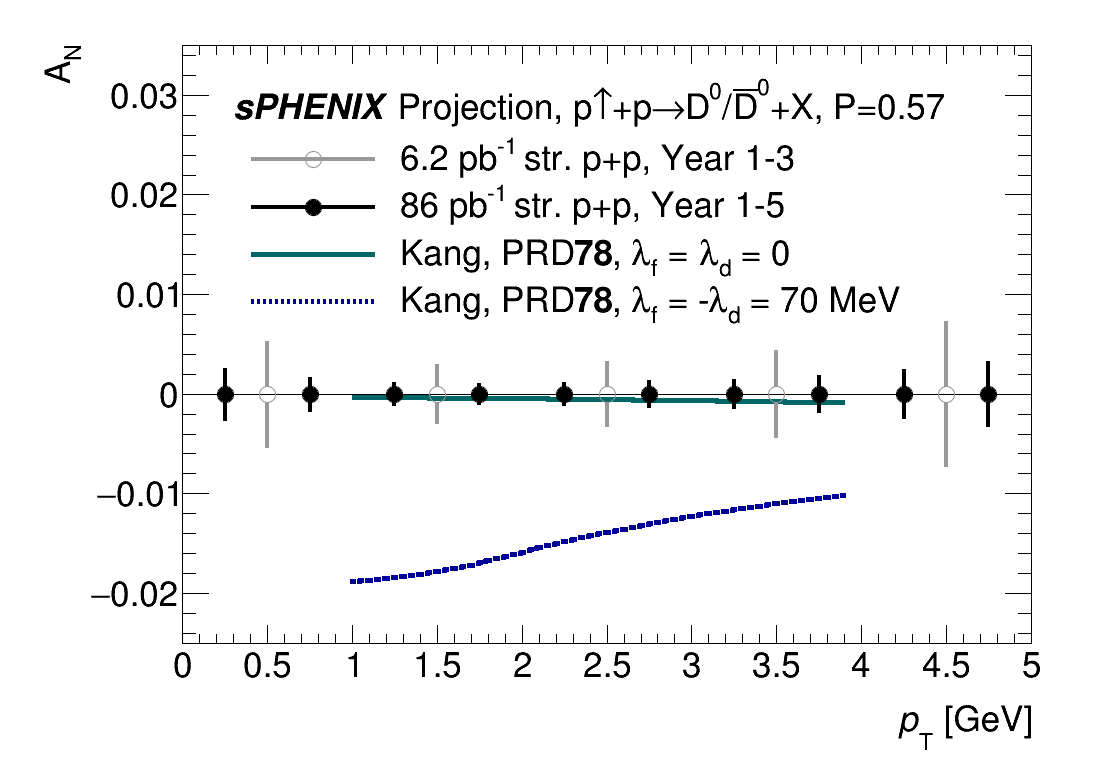

removed ‘fig_BUP2020/D0_BUP2020_AN_5yr_comparison.svg’


Info in <TCanvas::SaveSource>: C++ Macro file: fig_BUP2020/D0_BUP2020_AN_5yr_comparison.C has been generated


In [28]:
{

    TGraphErrors * grProD0_AN_pp_3year 
        = GraphShiftCut(
            Significance2AN( gProD0_Significance_pp_3year, 0, pp_beam_pol, 2),
            0., 0,100);
    TGraphErrors * grProD0_AN_pp_5year 
        = GraphShiftCut(
            Significance2AN( gProD0_Significance_pp_5year, 0, pp_beam_pol, 1),
            0., 0,100);
    
    grProD0_AN_pp_3year->SetMarkerStyle(kOpenCircle);
    grProD0_AN_pp_5year->SetMarkerStyle(kFullCircle);
    
    grProD0_AN_pp_3year->SetMarkerSize(2);
    grProD0_AN_pp_5year->SetMarkerSize(2);
        
    grProD0_AN_pp_3year->SetLineWidth(4);
    grProD0_AN_pp_5year->SetLineWidth(4);
    
    grProD0_AN_pp_3year->SetLineColorAlpha(kGray+1, 1);
    grProD0_AN_pp_5year->SetLineColorAlpha(kBlack, 1);
    
    grProD0_AN_pp_3year->SetMarkerColorAlpha(kGray+1, 1);
    grProD0_AN_pp_5year->SetMarkerColorAlpha(kBlack, 1);
    
    
    
    auto gs = getD0AN();
    auto g0 = gs.first;
    auto g07 = gs.second;

    assert(g0);
    assert(g07);

        
    TCanvas *c1 = new TCanvas("D0_BUP2020_AN_5yr_comparison" ,
                  "D0_BUP2020OOArArO_AN_5yr_comparison" , 1100, 800);
    c1->Divide(1, 1);
    int idx = 1;
    TPad *p;

    p = (TPad *) c1->cd(idx++);
    c1->Update();

    p->DrawFrame(0, -.025, 5, 0.035)->SetTitle(";#it{p}_{T} [GeV];A_{N}");
    (new TLine(0, -.0, 5, .0))->Draw();
    
    g0->Draw("l");
    g0->SetLineColor(kCyan + 3);
    g0->SetLineWidth(5);

    g07->Draw("l");
    g07->SetLineStyle(kDashed);
    g07->SetLineColor(kBlue+2);
    g07->SetLineWidth(5);
    
    
    grProD0_AN_pp_3year->DrawClone("p");
    grProD0_AN_pp_5year->DrawClone("p");
    
    TLegend * leg = new TLegend(.0, .8, .83, .95);
    leg->SetFillStyle(0);
//     leg->AddEntry("", "#it{#bf{sPHENIX}} Projection", "");
    leg->AddEntry("", Form("#it{#bf{sPHENIX}} Projection, p#uparrow+p#rightarrowD^{0}/#bar{D}^{0}+X, P=%.2f", pp_beam_pol), "");
    leg->Draw();
    
    leg = new TLegend(.2, .58 ,.85, .83);
    leg->SetFillStyle(0);
    leg->AddEntry(grProD0_AN_pp_3year, Form("%.1f pb^{-1} str. p+p, Year 1-3", pp_rec_3year/1e12), "pl");
    leg->AddEntry(grProD0_AN_pp_5year, Form("%.0f pb^{-1} str. p+p, Year 1-5", pp_rec_5year/1e12), "lp");
    leg->AddEntry(g0, "Kang, PRD#bf{78}, #lambda_{f} = #lambda_{d} = 0", "l");
    leg->AddEntry(g07, "Kang, PRD#bf{78}, #lambda_{f} = -#lambda_{d} = 70 MeV", "l");
    leg->Draw();
    
    c1->Draw();
    SaveCanvas(c1, "fig_BUP2020/" + TString(c1->GetName()), kTRUE);
}

# Post ops

In [30]:
gSystem->Exec("jupyter nbconvert --to html D0_BUP2020.ipynb")

[NbConvertApp] Converting notebook D0_BUP2020.ipynb to html


(int) 0


[NbConvertApp] Writing 852348 bytes to D0_BUP2020.html
